In [9]:
import glob
import loader
import seaborn as sns
import numpy as np
import tqdm
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

In [10]:
paths = '/home/pecoffet/remoterobo/logs/bm-nb-opp-2019-03-*/tp{}/**/rep00'
conds = [35, 40, 70, 100, 200, 500, 700, 1000, 1200]
total = []
for cond in conds:
    curpath = paths.format(cond)
    toanalyse = glob.glob(curpath)
    run =0
    print(cond)
    for coop in tqdm.tqdm_notebook(loader.getgenomes(toanalyse), total=len(toanalyse)):
        try:
            total.append({'median': np.median(coop), 'nbopp': cond, 'run': run})
        except Exception as e: print(e)
        run += 1

35



40



70



100



200



500



700



1000



1200


In [11]:
df = pd.DataFrame(total).query('run <= 50')

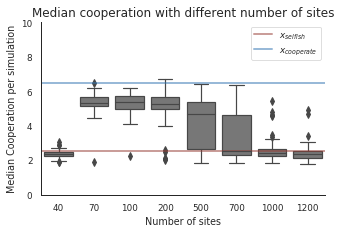

In [31]:
plosrcparams = {'backend': 'pdf',
                'axes.labelsize': 9,
                'xtick.labelsize': 9,
                'ytick.labelsize': 9,
                'legend.fontsize': 9,
                'lines.markersize': 3,
                'font.size': 9,
                'font.family': u'sans-serif',
                'font.sans-serif': ['Arial'],
                'text.usetex': False}

import matplotlib as mpl

mpl.rcParams.update(plosrcparams)
sns.set_context('paper')
sns.set_style('white')


sns.set_context('paper')
sns.set_style('white')
fig = plt.figure()
fig.set_size_inches(5.1, 5.1/1.61)
#sns.violinplot(data=df, x='nbopp', y='median', scale='count', color="#777777")
sns.boxplot(data=df, x='nbopp', y='median', color="#777777")
plt.xlabel('Number of sites')
plt.ylabel('Median Cooperation per simulation')
plt.ylim(0, 10)
plt.axhline(2.5, label="$x_{selfish}$", c="#963d35", linewidth=2, alpha=0.5)
plt.axhline(6.5, label="$x_{cooperate}$", c="#3375b2", linewidth=2, alpha=0.5)
plt.legend()
sns.despine()
plt.title('Median cooperation with different number of sites', fontsize=12);
plt.savefig('Results/nb_site_invest.pdf')
#plt.savefig('Results/nb_site_invest.tiff', dpi=600, compression="zlib");
#im = Image.open('Results/nb_site_invest.tiff')
#im.save('Results/nb_site_invest_c.tiff', compression='tiff_lzw')

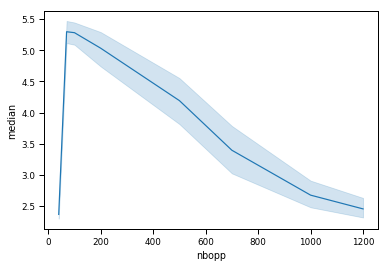

In [7]:
sns.lineplot(data=df, x='nbopp', y='median')

In [6]:
path = '../log/pdnotp/'
for coops in loader.getgenomes([path]):
    sns.distplot(coops)
    plt.xlim(0, 10)